# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [149]:
#Import all the necessary modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [150]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [151]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [152]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [153]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [154]:
pima_df.iloc[:,1:-1]=pima_df.iloc[:,1:-1].mask(pima_df==0,pima_df.median(),axis=1)
#for x in pima_df.iloc[:,1:-1]:
#    pima_df[pima_df[x]==0].replace(pima_df[pima_df[x]==0],pima_df[x].median())
        


# Q5 Print the descriptive statistics of each & every column using describe() function

In [155]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [156]:
pima_df['pres'].max()

122

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


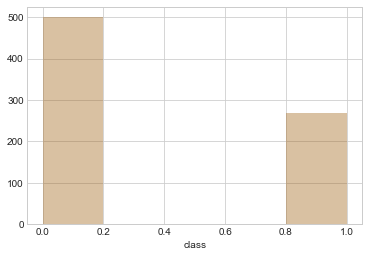

In [157]:
import seaborn as sns
sns.distplot(pima_df['class'], hist=True,kde=False);

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

from the mean and median of the attribute test since the mean is far greater than median it has more skewness compared
to other attributes

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


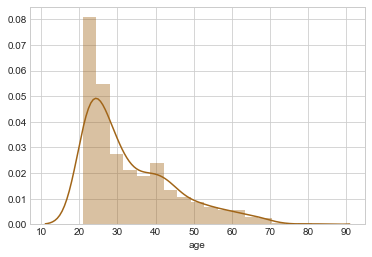

In [158]:
sns.distplot(pima_df['age'], kde=True);

from the above plot we can onfirm that the data collected is mostly for the people aged between 20-30

Using bivariate analysis check for useful relationships between attributes and attributes and the target class



C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


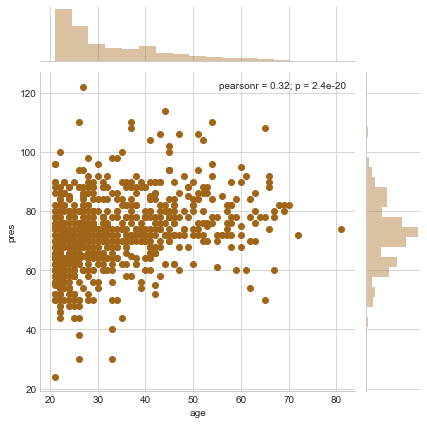

In [159]:
sns.jointplot(x='age', y='pres', data=pima_df);
#

In [160]:
sns.jointplot(x='class', y='test', data=pima_df
#from the below plot we can say that the class and test are not much correated but the correlation cant be ignored.

SyntaxError: unexpected EOF while parsing (<ipython-input-160-9b7002407f43>, line 2)

In [ ]:
sns.jointplot(x='class', y='age', data=pima_df);

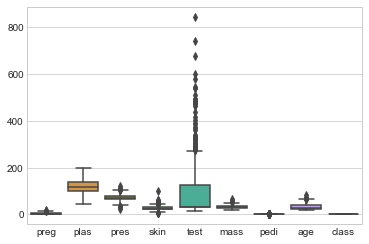

In [161]:
sns.boxplot(data=pima_df)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


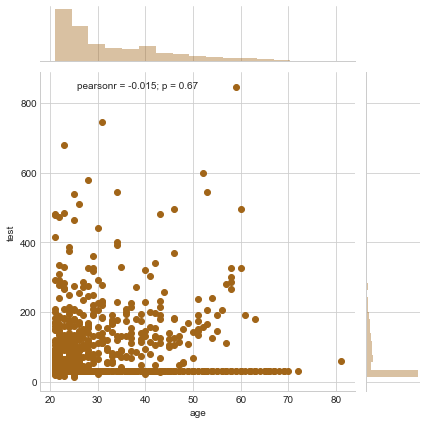

In [162]:
sns.jointplot(x='age', y='test', data=pima_df);
#from the below plot we can say that age and test are not muh correlated

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


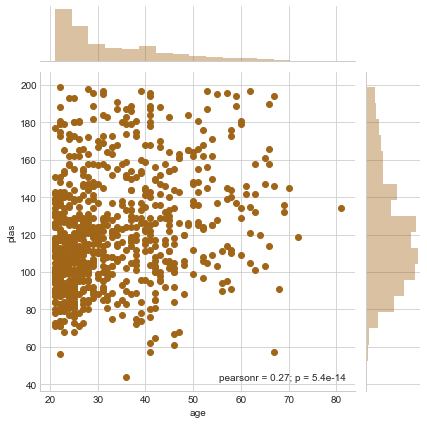

In [163]:
sns.jointplot(x='age', y='plas', data=pima_df);

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

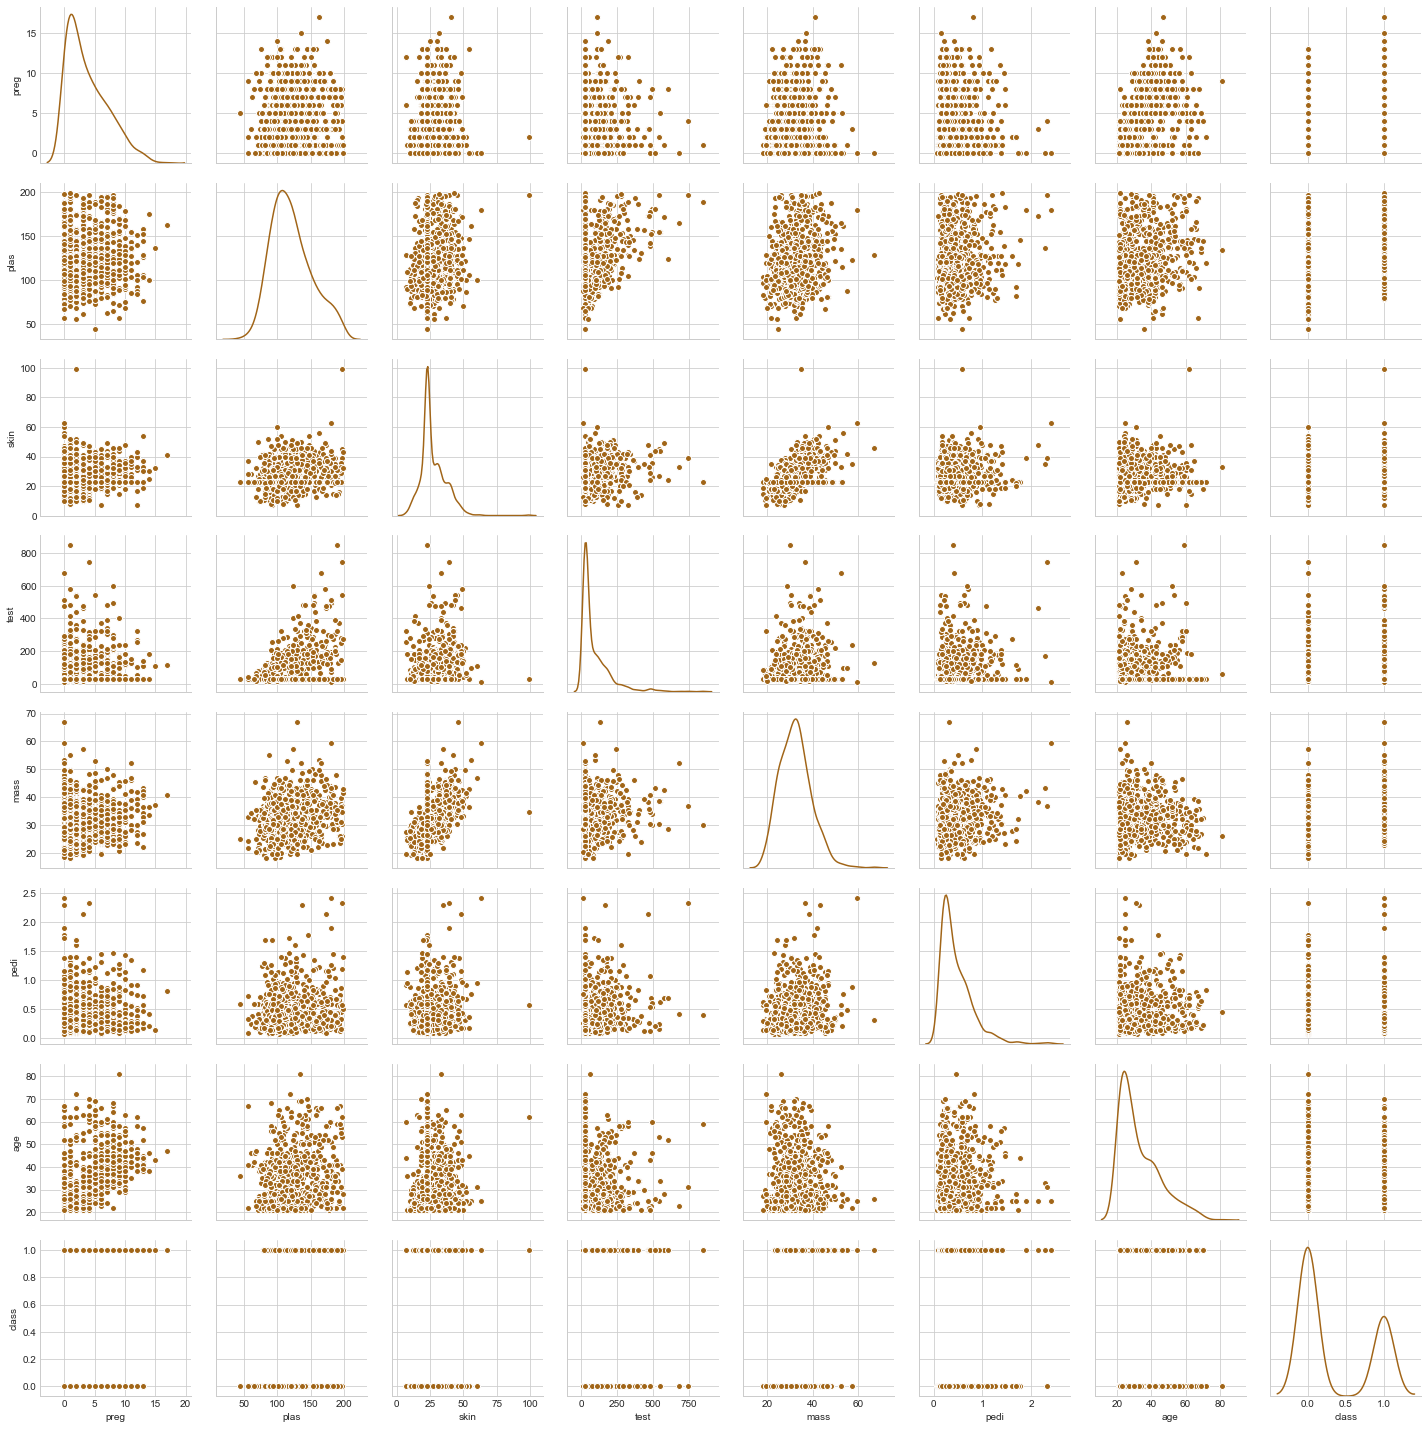

In [164]:
sns.set_palette("BrBG")
sns.set_style('whitegrid')
sns.pairplot(pima_df[['preg','plas','skin','test','mass','pedi', 'age', 'class']],diag_kind='kde')

#from the below plot we can say that there is no much correlation beteen age and test


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [165]:
X_train, X_test, y_train, y_test = train_test_split(pima_df.iloc[:,0:8], pima_df.iloc[:,-1], test_size=0.3, random_state=100)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [166]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy' )
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [167]:
print(decision_tree.score(X_test,y_test))

0.7056277056277056


In [168]:
y_predict= decision_tree.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predict))

[[118  32]
 [ 36  45]]


Print the feature importance of the decision model - Optional

In [169]:
decision_tree.feature_importances_

array([0.0884968 , 0.2831473 , 0.06537146, 0.08197695, 0.06865959,
       0.15964069, 0.08084353, 0.17186367])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [170]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifer= RandomForestClassifier(n_estimators=50)
random_forest_classifer.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
random_forest_classifer.score(X_test,y_test)

0.7272727272727273

In [184]:
y_predict=random_forest_classifer.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[121  29]
 [ 34  47]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [172]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostClassifier=AdaBoostClassifier(base_estimator=decision_tree , n_estimators=50)
adaBoostClassifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [173]:
adaBoostClassifier.score(X_test,y_test)

0.70995670995671

In [185]:
y_predict=adaBoostClassifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[120  30]
 [ 37  44]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [174]:
from sklearn.ensemble import BaggingClassifier
baggingClassifier= BaggingClassifier(base_estimator= decision_tree, n_estimators=50)
baggingClassifier.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [175]:
baggingClassifier.score(X_test,y_test)

0.7056277056277056

In [186]:
y_predict=baggingClassifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[120  30]
 [ 38  43]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
gradientBoostingClassifier= GradientBoostingClassifier(n_estimators= 50 )
gradientBoostingClassifier.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [178]:
gradientBoostingClassifier.score(X_test,y_test)

0.70995670995671

In [187]:
y_predict=gradientBoostingClassifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[116  34]
 [ 33  48]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [181]:
from sklearn.ensemble import VotingClassifier
#eclf1 = VotingClassifier(estimators=[
#         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
votingClassifier= VotingClassifier(estimators=[('lr',random_forest_classifer),('ada',adaBoostClassifier),('bc',baggingClassifier)
                                              ])
votingClassifier.fit(X_train,y_train,sample_weight=None)

VotingClassifier(estimators=[('lr', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [182]:
votingClassifier.score(X_test,y_test)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7229437229437229

In [188]:
y_predict=votingClassifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[121  29]
 [ 35  46]]


C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
